In [2]:
#import pandas
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#import metro dataset
metro = pd.read_csv('Metro_Interstate_Traffic_Volume.csv',parse_dates=['date_time'])


#replace labelled 'none' as 0 to turn holiday into boolean
 #df.dt accesses time series dates
metro['day'] = metro['date_time'].dt.floor('d')
#df.ne Compare DataFrames for inequality elementwise
#df.groupby splits data into groups, by day in this case
holiday = metro['holiday'].ne('None').groupby(metro['day']).sum() > 0 
#drops column 'holiday', axis 1 means column
metro.drop('holiday', axis=1, inplace=True)
#merges  holiday and day
metro = metro.merge(holiday, left_on='day', right_index=True)
#drops day
metro.drop('day', axis=1, inplace=True)


# Remove corrupt data points
metro = metro[(metro['rain_1h'] < 20) & (metro['temp'] > 200)]

# Take subset to reduce overplotting
metro_one_week = metro[
    (metro['date_time'] > '2016-06-01 00:00:00') &
    (metro['date_time'] < '2016-06-08 00:00:00')
].reset_index(drop=True)

In [6]:
# View the metro dataset
metro_one_week.head()

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,holiday
0,289.48,0.0,0.0,20,Clouds,few clouds,2016-06-01 01:00:00,441,False
1,289.42,0.0,0.0,20,Clouds,few clouds,2016-06-01 02:00:00,321,False
2,289.01,0.0,0.0,1,Clear,sky is clear,2016-06-01 03:00:00,337,False
3,288.47,0.0,0.0,1,Clear,sky is clear,2016-06-01 04:00:00,917,False
4,287.49,0.0,0.0,20,Clouds,few clouds,2016-06-01 05:00:00,3160,False


In [7]:
#another way to extract a column 
metro_one_week.temp

0      289.48
1      289.42
2      289.01
3      288.47
4      287.49
        ...  
179    293.97
180    293.08
181    290.80
182    288.13
183    286.80
Name: temp, Length: 184, dtype: float64

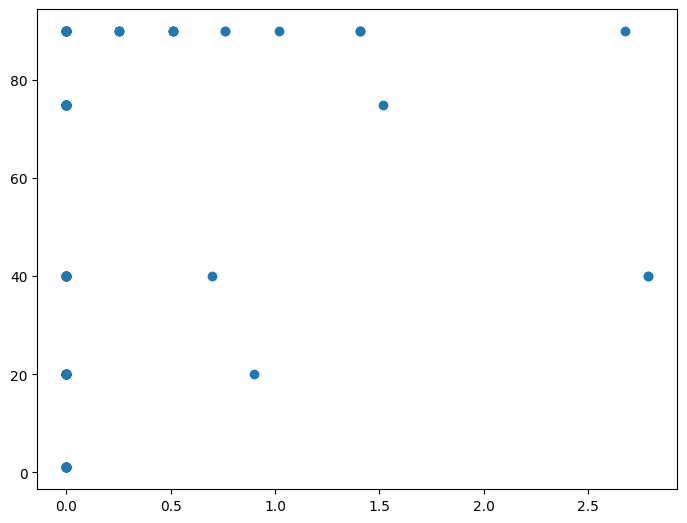

In [8]:
#Using the object-oriented interface, we first create a figure, add a set of axes, and then add a plot. For example, we could create a scatter plot of pH against citric acid levels.
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
#[x,y,w,h] -> (x,y) is the origin (left corner), (w,h) is the width and height
#adds scatter to ax
ax.scatter(metro_one_week.rain_1h, metro_one_week.clouds_all)
plt.show()

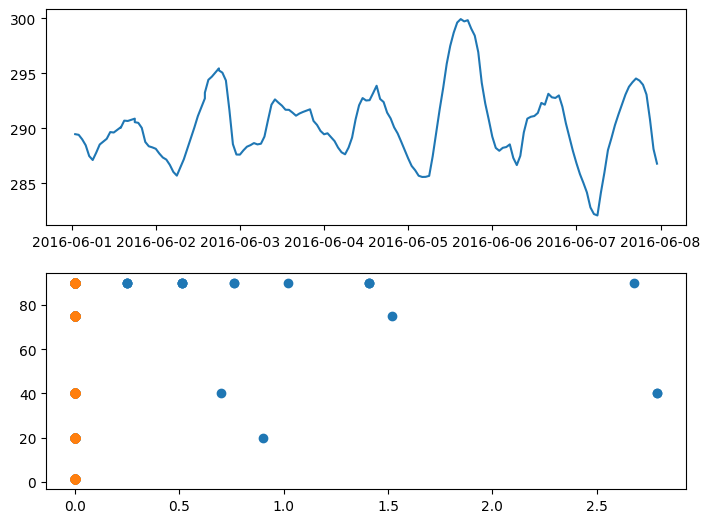

In [9]:
#line plot
# Scatter plot of clouds against rain/snow
# and line plot of temperature over time
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 0.45])
ax2 = fig.add_axes([0, 0.55, 1, 0.45])
ax1.scatter(metro_one_week.rain_1h, metro_one_week.clouds_all)
ax1.scatter(metro_one_week.snow_1h, metro_one_week.clouds_all)
#line
ax2.plot(metro_one_week.date_time, metro_one_week.temp)
plt.show()

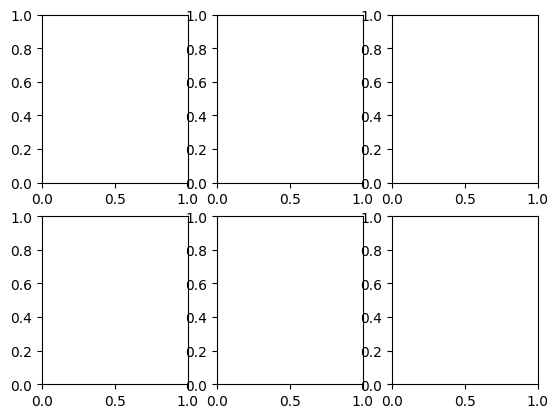

In [ ]:
#subplots - plots where axes and figure are created at the same time
#creates 6 subplots, 2 by 3
fig, axs = plt.subplots(2, 3)
#axs can be indexed to access individual exes
fig, axs = plt.subplots(2, 3)
axs[1][1].scatter(metro_one_week.rain_1h, metro_one_week.clouds_all)
axs[0][2].scatter(metro_one_week.rain_1h, metro_one_week.temp)
plt.show()

In [18]:
#line style and line width(ls,lw)
fig, ax = plt.subplots()
ax.plot(metro_one_week.date_time, metro_one_week.temp, ls = '--', lw = 6)
plt.show()

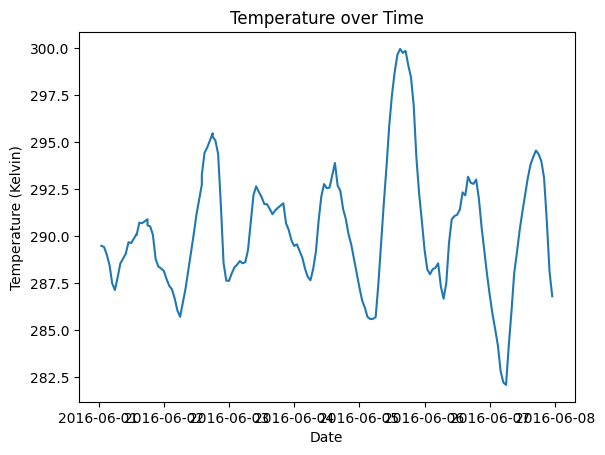

In [19]:
#axis labels!
# Create a labelled plot of temperature over time
fig, ax = plt.subplots()
ax.plot(metro_one_week.date_time, metro_one_week.temp)
ax.set_xlabel("Date")
ax.set_ylabel("Temperature (Kelvin)")
ax.set_title("Temperature over Time")
plt.show()

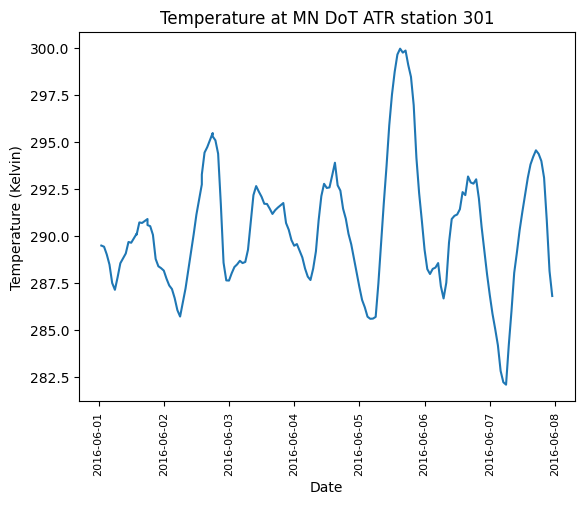

In [20]:
# Rotate the x-axis labels by 90 degrees and shrink to size 8
fig, ax = plt.subplots()
ax.plot(metro_one_week.date_time, metro_one_week.temp)
ax.set_xlabel('Date')
ax.xaxis.set_tick_params(rotation=90, labelsize=8)
ax.set_ylabel('Temperature (Kelvin)')
ax.set_title('Temperature at MN DoT ATR station 301')
plt.show()

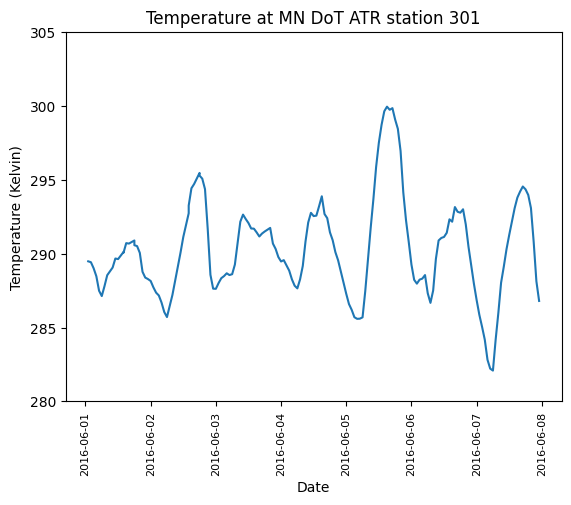

In [21]:
# Expand the y-axis range to (280, 305)
fig, ax = plt.subplots()
ax.plot(metro_one_week.date_time, metro_one_week.temp)
ax.set_xlabel('Date')
ax.xaxis.set_tick_params(rotation=90, labelsize=8)
ax.set_ylabel('Temperature (Kelvin)')
ax.set_ylim(280, 305)
ax.set_title('Temperature at MN DoT ATR station 301')
plt.show()

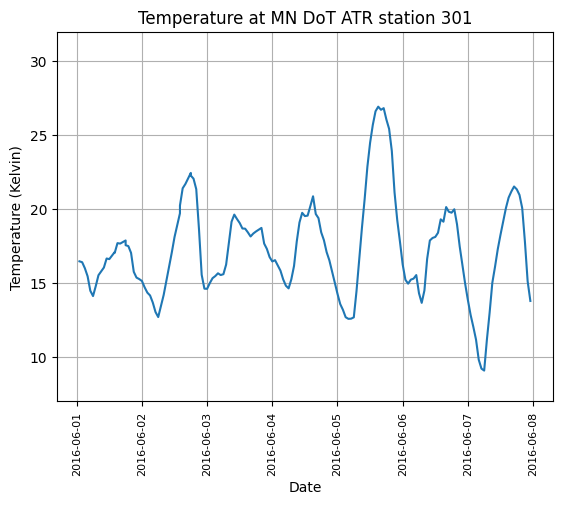

In [25]:
# Add major gridlines in the background
fig, ax = plt.subplots()
ax.plot(metro_one_week.date_time, metro_one_week.temp - 273)
ax.set_xlabel('Date')
ax.xaxis.set_tick_params(rotation=90, labelsize=8)
ax.set_ylabel('Temperature (Kelvin)')
ax.set_ylim(7, 305-273)
ax.set_title('Temperature at MN DoT ATR station 301')
#make it show behind the plot
ax.grid(zorder=0)
plt.show()

In [ ]:
# Add minor gridlines in the background with moderate transparency
fig, ax = plt.subplots()
ax.plot(metro_one_week.date_time, metro_one_week.temp)
ax.set_xlabel('Date')
ax.xaxis.set_tick_params(rotation=90, labelsize=8)
ax.set_ylabel('Temperature (Kelvin)')
ax.set_ylim(280, 305)
ax.set_title('Temperature at MN DoT ATR station 301')
ax.grid(zorder=0)
# ...
plt.show()

In [ ]:
#histograms!

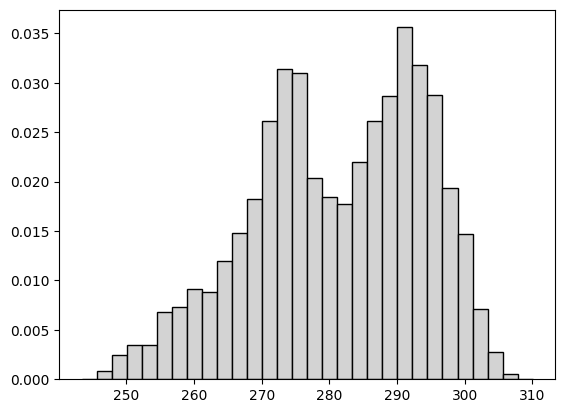

In [27]:
# Create a histogram of temperature
#bins - number of bars, density - count vs density 
fig, ax = plt.subplots()
ax.hist(metro.temp, bins=30, density=True, color="lightgray", edgecolor="black")
plt.show()


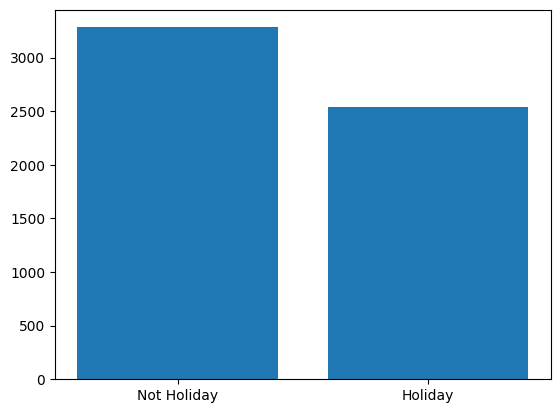

In [40]:
# Create a bar chart of average traffic on holidays and regular days
#set axis ticks manually
avg_traffic = metro.groupby('holiday', as_index=False)['traffic_volume'].mean()
fig, ax = plt.subplots()
ax.bar(avg_traffic['holiday'], avg_traffic['traffic_volume'])
ax.set_xticks([0, 1])
ax.set_xticklabels(['Not Holiday', 'Holiday'])
plt.show()

In [ ]:
#finishing touches

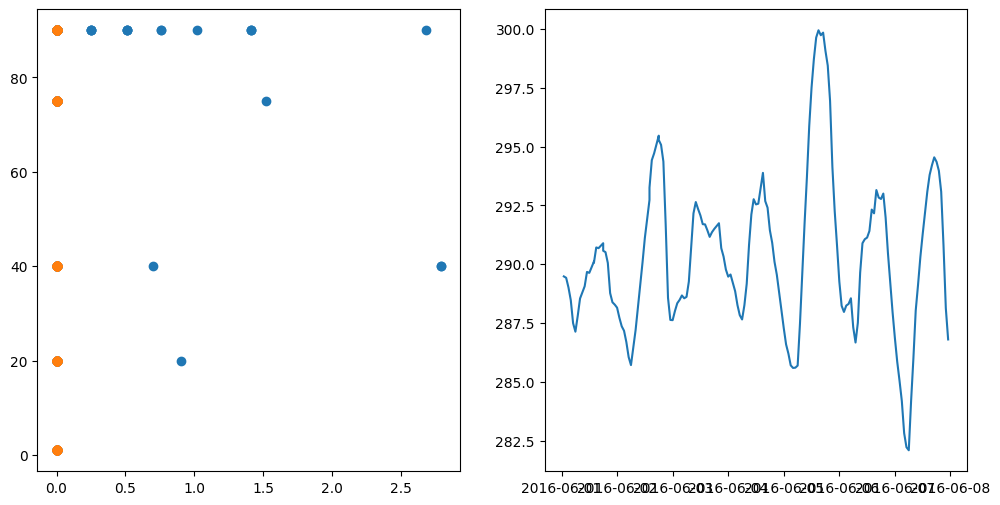

In [28]:
#figure size
# Set the plot to be 12x6 inches
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(metro_one_week.rain_1h, metro_one_week.clouds_all)
ax1.scatter(metro_one_week.snow_1h, metro_one_week.clouds_all)
ax2.plot(metro_one_week.date_time, metro_one_week.temp)
plt.show()

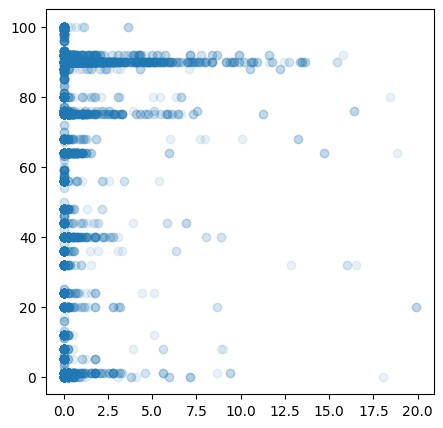

In [39]:
#resolution
# Create a 5x5 inch plot at 20dpi
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)  # <- modify this
ax.scatter(metro.rain_1h, metro.clouds_all, alpha=0.1)
plt.show()

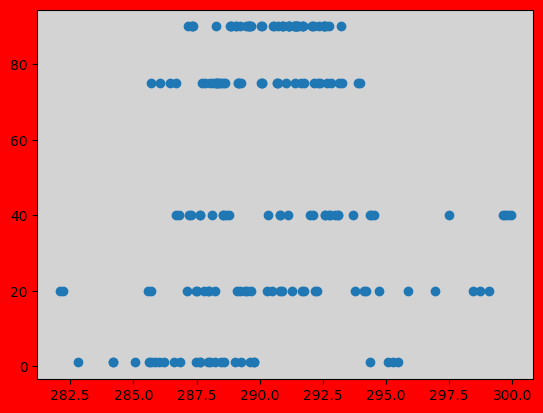

In [36]:
#background
# Set the figure background to a light grey
fig, ax = plt.subplots()
ax.set_facecolor('lightgrey')
ax.scatter(metro_one_week.temp, metro_one_week.clouds_all)
fig.set_facecolor('red')

plt.show()

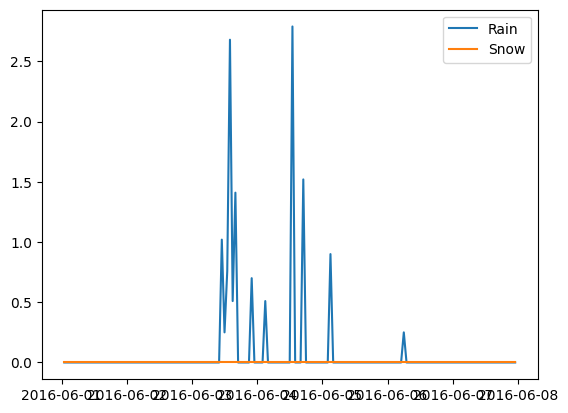

In [41]:
#legend
# Plot of rainfall and snowfall over time
fig, ax = plt.subplots()
ax.plot(metro_one_week.date_time, metro_one_week.rain_1h, label="Rain")  # <- modify this
ax.plot(metro_one_week.date_time, metro_one_week.snow_1h, label="Snow")  # <- modify this
ax.legend()
plt.show()

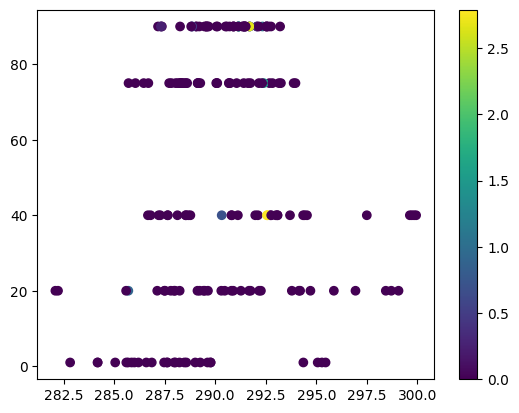

In [42]:
#colorbar legend
# Same as above but coloured by rainfall with colour bar
fig, ax = plt.subplots()
sc = ax.scatter(metro_one_week.temp, metro_one_week.clouds_all, c=metro_one_week.rain_1h)  # <- modify this
fig.colorbar(sc)
plt.show()

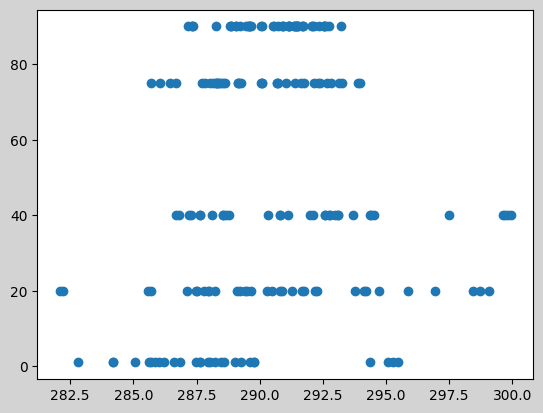

In [43]:
# Save the figure as a png file
fig, ax = plt.subplots()
ax.scatter(metro_one_week.temp, metro_one_week.clouds_all)
fig.set_facecolor('lightgray')
plt.savefig("cloud_temp.png")